In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logomaker
from tqdm import tqdm
from PIL import Image
# import os
# import pickle

### 0. 读取结果文件

In [3]:
baseline_dir = './baseline/'
generation_dir = './generation/'
testdata_dir = './testdata/'

In [4]:
# baseline dir files
dynamic_id_average_case_tm_score = pd.read_pickle(baseline_dir + 'dynamic-id_average_case_tm_scores.pkl')
dynamic_id_best_strategy_tm_score = pd.read_pickle(baseline_dir + 'dynamic-id_best_strategy_tm_scores.pkl')
dynamic_id_list_case_tm_score = pd.read_pickle(baseline_dir + 'dynamic-id_list_case_tm_scores.pkl')
aextracted_tm_scores = pd.read_pickle(baseline_dir + 'aextracted_tm_scores.pkl')

average_case_tm_scores = pd.read_pickle(baseline_dir + 'average_case_tm_scores.pkl')
best_strategy_tm_scores = pd.read_pickle(baseline_dir + 'best_strategy_tm_scores.pkl')

# generation dir files
top_k_shot0 = pd.read_pickle(generation_dir + 'tmp_1.0_p_0.0_k_5_prefix_0_res.pkl')
top_k_shot1 = pd.read_pickle(generation_dir + 'tmp_1.0_p_0.0_k_5_prefix_1_res.pkl')
top_k_shot3 = pd.read_pickle(generation_dir + 'tmp_1.0_p_0.0_k_5_prefix_3_res.pkl')
top_k_shot6 = pd.read_pickle(generation_dir + 'tmp_1.0_p_0.0_k_5_prefix_6_res.pkl')

top_p_shot0 = pd.read_pickle(generation_dir + 'tmp_1.0_p_1.0_k_0_prefix_0_res.pkl')
top_p_shot1 = pd.read_pickle(generation_dir + 'tmp_1.0_p_1.0_k_0_prefix_1_res.pkl')
top_p_shot3 = pd.read_pickle(generation_dir + 'tmp_1.0_p_1.0_k_0_prefix_3_res.pkl')
top_p_shot6 = pd.read_pickle(generation_dir + 'tmp_1.0_p_1.0_k_0_prefix_6_res.pkl')

# testdata dir files
selected_benchmark_dataset = pd.read_csv(testdata_dir + 'selected_benchmark_dataset.tsv', sep='\t')
bm160case2msa = pd.read_pickle(testdata_dir + 'bm160case2msa.pkl')
bm40_name2id  = pd.read_pickle(testdata_dir + 'benchmark40_name2id.pkl')

ANA_CASE_LIST = list(dynamic_id_best_strategy_tm_score.keys())

In [5]:
def calculate_sequence_identity(seq1, seq2):
    matches = sum(res1 == res2 for res1, res2 in zip(seq1, seq2))
    try:
        identity = matches / min(len(seq1), len(seq2))
    except:
        print(seq1, seq2)
    return identity



def query_case_value_df(query_dict, query_list):
    query_df = []
    for case in query_dict.keys():
        query_values = [query_dict[case][key] for key in query_list]
        query_df.append(query_values)
    query_df = pd.DataFrame(query_df, index = query_dict.keys(), columns = query_list)
    return query_df

### 1. MSA Augmentation

In [7]:
settings = ['-baseline', '-seqs2seqs', '-evogen', 'shot_16augment']
ana_columns_1 = ['single', 'uni', 'uni_top', 'full'] + [f'1{st}' for st in settings]
ana_df_1 = query_case_value_df(dynamic_id_best_strategy_tm_score, ana_columns_1)
ana_df_1 = ana_df_1.sort_values('single')

ana_columns_3 = ['single', 'uni', 'uni_top', 'full'] + [f'3{st}' for st in settings]
ana_df_3 = query_case_value_df(dynamic_id_best_strategy_tm_score, ana_columns_3)
ana_df_3 = ana_df_3.sort_values('single')

ana_columns_6 = ['single', 'uni', 'uni_top', 'full'] + [f'6{st}' for st in settings]
ana_df_6 = query_case_value_df(dynamic_id_best_strategy_tm_score, ana_columns_6)
ana_df_6 = ana_df_6.sort_values('single')

compare_list = []
compare_list_hard = []

plot_ana_df_1 = ana_df_1[['1-baseline', '1-seqs2seqs', '1-evogen', '1shot_16augment']]
plot_ana_df_1.columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment']
compare_list.append(list(plot_ana_df_1.mean(axis=0)))

plot_ana_df_1_hard = ana_df_1.query("single <= 0.31")[['1-baseline', '1-seqs2seqs', '1-evogen', '1shot_16augment']]
plot_ana_df_1_hard.columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment']
compare_list_hard.append(list(plot_ana_df_1_hard.mean(axis=0)))


plot_ana_df_3 = ana_df_3[['3-baseline', '3-seqs2seqs', '3-evogen', '3shot_16augment']]
plot_ana_df_3.columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment']
compare_list.append(list(plot_ana_df_3.mean(axis=0)))

plot_ana_df_3_hard = ana_df_3.query("single <= 0.31")[['3-baseline', '3-seqs2seqs', '3-evogen', '3shot_16augment']]
plot_ana_df_3_hard.columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment']
compare_list_hard.append(list(plot_ana_df_3_hard.mean(axis=0)))


plot_ana_df_6 = ana_df_6[['6-baseline', '6-seqs2seqs', '6-evogen', '6shot_16augment']]
plot_ana_df_6.columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment']
compare_list.append(list(plot_ana_df_6.mean(axis=0)))

plot_ana_df_6_hard = ana_df_6.query("single <= 0.31")[['6-baseline', '6-seqs2seqs', '6-evogen', '6shot_16augment']]
plot_ana_df_6_hard.columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment']
compare_list_hard.append(list(plot_ana_df_6_hard.mean(axis=0)))

compare_df = pd.DataFrame(compare_list, index=['1_shot', '3_shot', '6_shot'], columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment'])

compare_df_hard = pd.DataFrame(compare_list_hard, index=['1_shot', '3_shot', '6_shot'], columns = ['baseline', 'seqs2seqs', 'evogen', 'ours_16augment'])

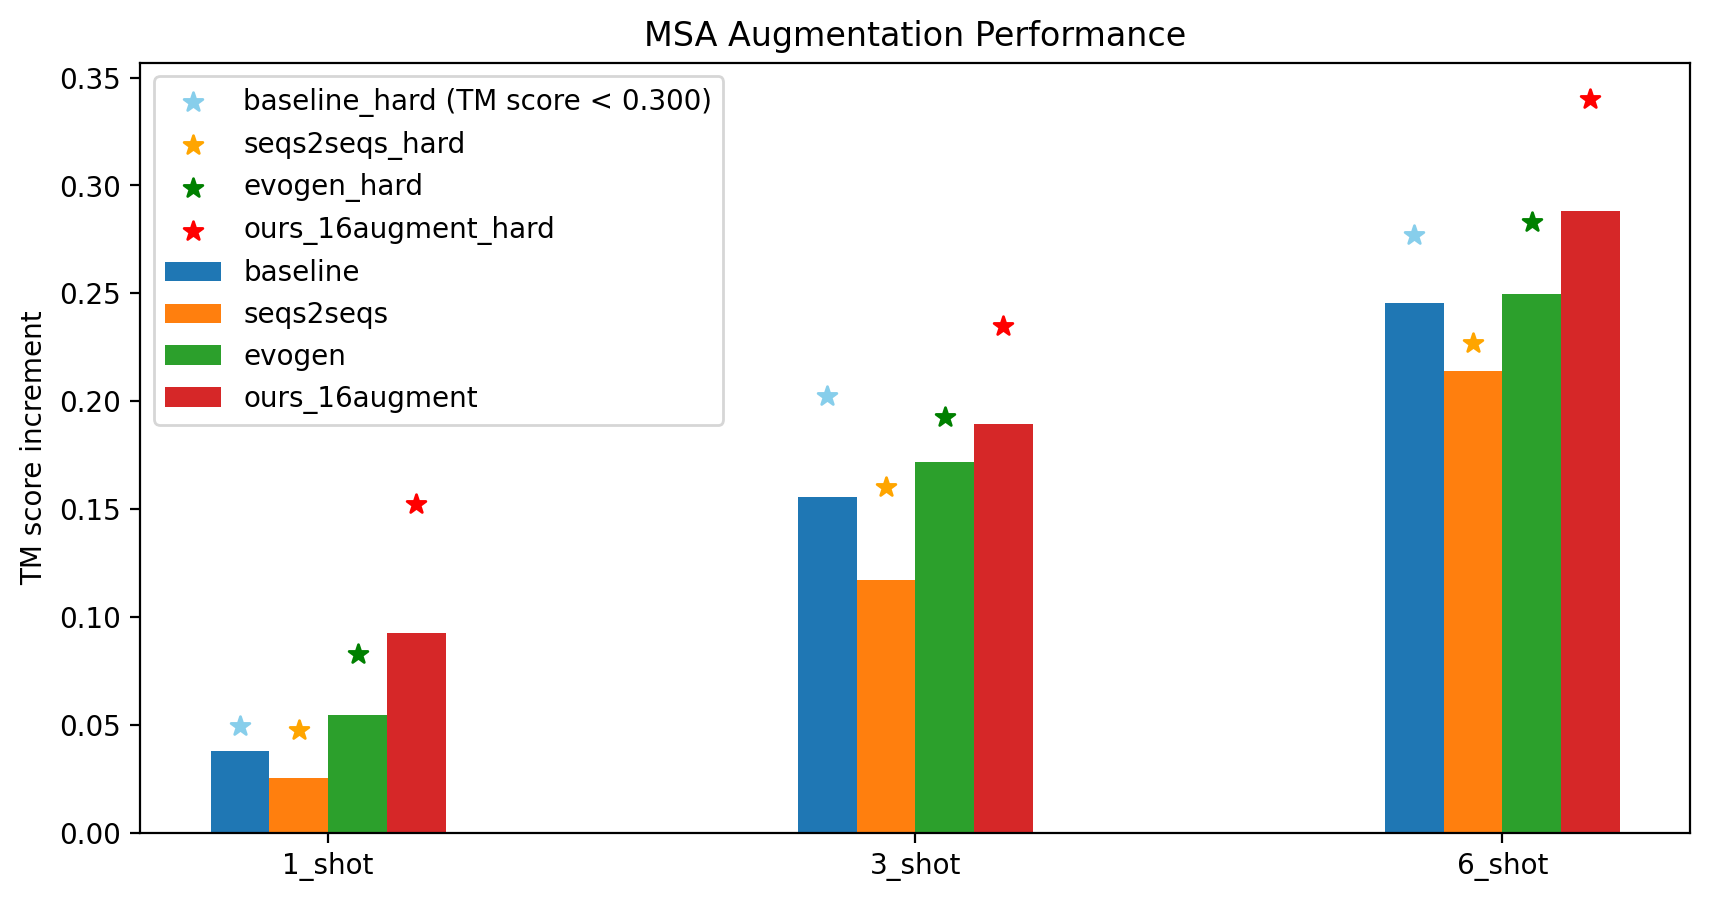

In [8]:
X = ['1_shot','3_shot','6_shot']   
X_axis = np.arange(len(X)) 

plt.figure(figsize=(10, 5), dpi=200)
plt.bar(X_axis - 0.15, compare_df['baseline'], 0.1, label = 'baseline') 
plt.bar(X_axis - 0.05, compare_df['seqs2seqs'], 0.1, label = 'seqs2seqs') 
plt.bar(X_axis + 0.05, compare_df['evogen'], 0.1, label = 'evogen') 
plt.bar(X_axis + 0.15, compare_df['ours_16augment'], 0.1, label = 'ours_16augment') 

plt.scatter(X_axis - 0.15, compare_df_hard['baseline'], 50, marker='*', label = 'baseline_hard (TM score < 0.300)', color='skyblue') 
plt.scatter(X_axis - 0.05, compare_df_hard['seqs2seqs'], 50, marker='*', label = 'seqs2seqs_hard', color='orange') 
plt.scatter(X_axis + 0.05, compare_df_hard['evogen'], 50, marker='*', label = 'evogen_hard', color='green') 
plt.scatter(X_axis + 0.15, compare_df_hard['ours_16augment'], 50, marker='*', label = 'ours_16augment_hard', color='red') 

plt.xticks(X_axis, X)
plt.title("MSA Augmentation Performance")
plt.ylabel('TM score increment')

plt.legend()
plt.show()

### 2. MSA Replacement, Efficiency & Accuracy

In [9]:
query_df = []

for case in aextracted_tm_scores.keys():
    query_values = []
    query_values.append(aextracted_tm_scores[case]['single'])
    query_values.append(aextracted_tm_scores[case]['full'])
    query_values.append(aextracted_tm_scores[case]['uni_top'])

    for i in [1, 4, 8, 12, 16, 24, 32, 48]:
        k_key, p_key = f'0-p_0.0_k_5-{i}-w/o_context', f'0-p_1.0_k_0-{i}-w/o_context'
        query_values.append(max(aextracted_tm_scores[case][k_key], aextracted_tm_scores[case][p_key]))
        
    query_df.append(query_values)

shot0_best_ana_df = pd.DataFrame(query_df, index=list(aextracted_tm_scores.keys()), columns = ['single', 'full', 'uni_top'] + [f'0shot_{i}rep' for i in [1, 4, 8, 12, 16, 24, 32, 48]])

tmp_df = selected_benchmark_dataset[['Name', 'UniClust30_unfiltered']]
tmp_df.columns = ['case', 'case_IS_sim']
shot0_best_ana_df = pd.concat([shot0_best_ana_df, tmp_df.set_index('case')], axis=1)

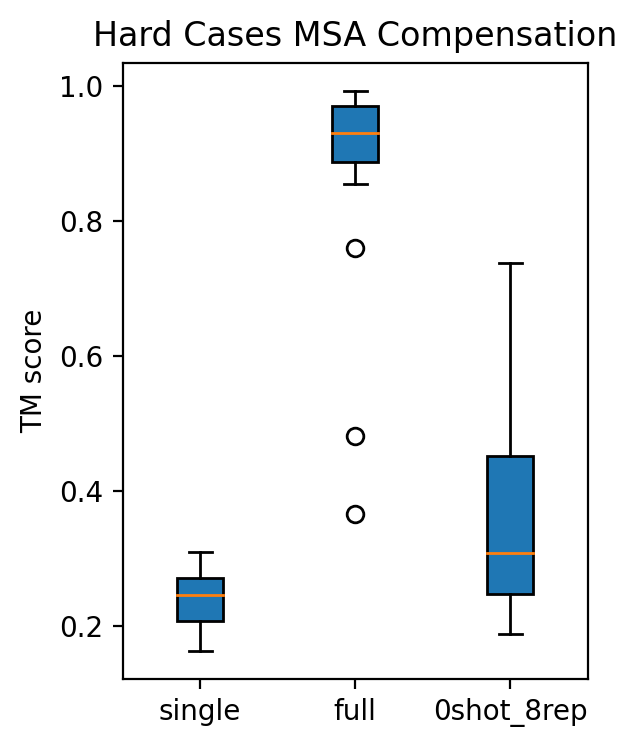

In [10]:
plt.figure(figsize=(3, 4), dpi=200)
plt.boxplot(shot0_best_ana_df.query("single <= 0.31 and case_IS_sim >= 0.80")[['single', 'full', '0shot_8rep']],
            # notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=['single', 'full', '0shot_8rep'])  # will be used to label x-ticks)
plt.title("Hard Cases MSA Compensation")
plt.ylabel('TM score')
plt.show()

### 3. MSA distribution

In [11]:
"""
find the positions having least '-', count corresponding natural MSA and generated MSA

"""

ana_case_MSA_natural = []

for ana_case in tqdm(bm160case2msa.keys()):
    try:
        gap_sen_df = []
        for sentence in bm160case2msa[ana_case]:
            gap_sen_df.append([c for c in sentence if c])

        most_filled_pos = ((1.0 * (pd.DataFrame(gap_sen_df) != '-')).sum(axis=0).sort_values(ascending=False)[:50].index)

        new_sen_list = []
        for sentence in bm160case2msa[ana_case]:
            new_sen = ''
            for pos in most_filled_pos:
                new_sen = new_sen + sentence[pos]
            new_sen_list.append(new_sen)
        
        new_our_sen_list = []
        our_sen_sim = []
        for entry in top_p_shot6[ana_case]['generate']:
            sentence = entry[0]
            new_sen = ''
            for pos in most_filled_pos:
                new_sen = new_sen + sentence[pos]
            new_our_sen_list.append(new_sen)
            our_sen_sim.append(entry[1])
            
        single_sim_series = pd.Series([calculate_sequence_identity(new_sen_list[0], new_sen_list[i]) for i in range(1, len(new_sen_list))])
        single_sim_series_ours = pd.Series(our_sen_sim)
        
        if single_sim_series[single_sim_series > 0.7].shape[0] < 20:
            continue
            # print(ana_case)
        else:
            ana_case_MSA_natural.append([ana_case, 
                                        [new_sen_list[tt] for tt in single_sim_series[single_sim_series > 0.7].index],
                                        [new_our_sen_list[tt] for tt in single_sim_series_ours[single_sim_series_ours > 0.7].index]])
    except:
        # print(ana_case)
        continue

  0%|          | 0/160 [00:00<?, ?it/s]

100%|██████████| 160/160 [02:01<00:00,  1.31it/s]


In [12]:
vocab = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']

def draw_logo(seqs, valid_index, suffix):
    data = { a:[0 for _ in range(len(valid_index))] for a in vocab }
    for seq in seqs:
        if len(seq) <= valid_index[-1] or 'X' in seq:
            continue
        for idx, aa_idx in enumerate(valid_index):
            data[seq[aa_idx]][idx] += 1 / len(seqs)

    df = pd.DataFrame(data)

    # Create the logo for one of the proteins
    logo = logomaker.Logo(df)

    # Customize the logo
    logo.style_xticks(rotation=90, fmt='%d', anchor=0)

    # Add title and labels as needed
    logo.ax.set_title(suffix)
    logo.ax.set_xlabel('Position')
    logo.ax.set_ylabel('Probability')

    # save plot
    # plt.savefig(f'./{suffix}.png')

In [13]:
def concat_sub_logos(data1, data2, min_len, case_name):
    """
    data1: natural MSA list
    data2: our MSA list
    """
    draw_logo(data1, [i for i in range(min_len)], f'{case_name}_natural_high_similarity_MSA')
    draw_logo(data2, [i for i in range(min_len)], f'{case_name}_ours_high_similarity_MSA')
    
    # concat pngs
    im_file_list = [f'{case_name}_natural_high_similarity_MSA.png', f'{case_name}_ours_high_similarity_MSA.png']
    ims = [Image.open(fn) for fn in im_file_list]
    width, height = ims[0].size

    result = Image.new(ims[0].mode, (width, height * len(ims)))

    for i, im in enumerate(ims):
        result.paste(im, box=(0, i * height))

    # result.save(f'{case_name}_logos.png')
    # os.system(f'del {case_name}_natural_high_similarity_MSA.png')
    # os.system(f'del {case_name}_ours_high_similarity_MSA.png')
    

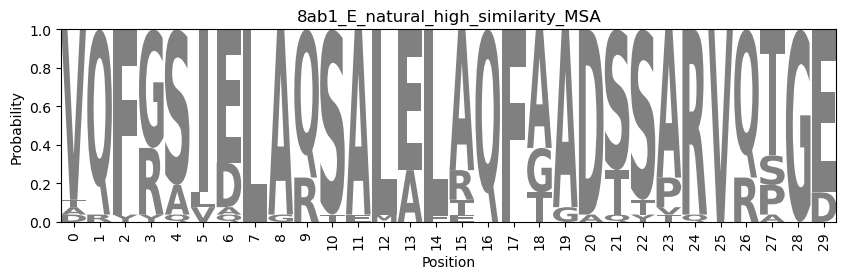

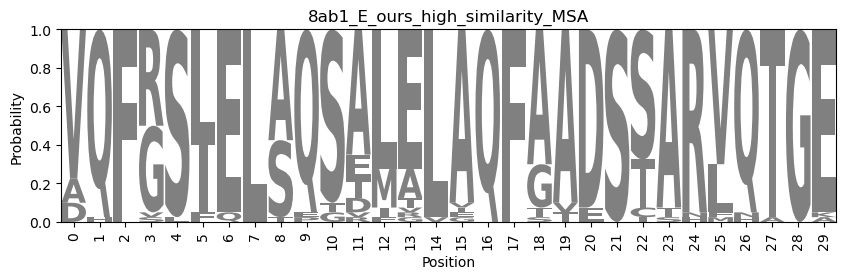

In [22]:
draw_logo(ana_case_MSA_natural[12][1], [i for i in range(30)], f'{ana_case_MSA_natural[12][0]}_natural_high_similarity_MSA')
draw_logo(ana_case_MSA_natural[12][2], [i for i in range(30)], f'{ana_case_MSA_natural[12][0]}_ours_high_similarity_MSA')